In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import sys
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import configparser
sys.path.insert(0, 'Utils/')

from AISDataManager import AISDataManager
import SimpleUtils as sU
import Constants as c
import TimeUtils as timeUtils
import datetime

aISDM = AISDataManager()

In [3]:
def convert_to_seconds(timeDel):
    return datetime.timedelta.total_seconds(timeDel)

In [4]:
srcDir = "/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/"
mMSIListFile = srcDir + 'VesselTrajCount.txt'
mMSIList = [line.rstrip('\n') for line in open(mMSIListFile)]

trajSOGMeanList = []
trajSOGMedianList = []
trajSOGStdList = []
trajLenList = []
trajDF = pd.DataFrame(columns=['MMSI' \
                               , 'TRAJ_NUM' \
                               , 'TRAJ_TIME' \
                               , 'SOG_MEAN' \
                               , 'SOG_MEDIAN' \
                               , 'SOG_STD' \
                               , 'TRAJ_MON' \
                               , 'TRAJ_YEAR' \
                               , ])

totalTrajectories = 0
for mMSI in mMSIList[0:-1]:
    vesselName, numTrajs, _ = mMSI.split("-")
    for traj in range(int(numTrajs)):
        vesselFileName = srcDir + vesselName + '_' + str(traj) + '.csv'
        print(vesselFileName)
        ret, _ = aISDM.load_data_from_csv(vesselFileName) 
        ret = aISDM.formate_time(ret,'DateTime')
        trajInitT = ret['DateTime'][0]
        trajEndT = ret['DateTime'][ret['DateTime'].shape[0]-1]
        
        trajLen = convert_to_seconds(trajEndT - trajInitT)/timeUtils.NUM_SEC_IN_MIN
        
        trajLenList.append(trajLen)
        trajSOGMeanList.append(ret[c.SOG_COL_NAME].mean())
        trajSOGMedianList.append(ret[c.SOG_COL_NAME].median())
        trajSOGStdList.append(ret[c.SOG_COL_NAME].std())
        
        trajDF = trajDF.append({'MMSI':vesselName \
                                ,'TRAJ_NUM':traj \
                                ,'TRAJ_TIME':trajLen \
                                ,'SOG_MEAN':ret[c.SOG_COL_NAME].mean() \
                                ,'SOG_MEDIAN':ret[c.SOG_COL_NAME].median() \
                                ,'SOG_STD':ret[c.SOG_COL_NAME].std() \
                                ,'TRAJ_MON':trajInitT.month \
                                ,'TRAJ_YEAR':trajInitT.year \
                               } \
                                , ignore_index= True)
        
        totalTrajectories = totalTrajectories + 1
        
trajSOGMeanList = np.array(trajSOGMeanList)
trajSOGMedianList = np.array(trajSOGMedianList)
trajSOGStdList = np.array(trajSOGStdList)
trajLenList = np.array(trajLenList)

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356577000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356577000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356577000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356577000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356577000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356577000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356577000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356577000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356577000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356577000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3565

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477271300_32.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477271300_33.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477271300_34.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477271300_35.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477271300_36.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477271300_37.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477271300_38.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477271300_39.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355481000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355481000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356581000_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356581000_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356581000_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356581000_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356581000_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356581000_23.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356581000_24.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355416000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355416000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355416000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_10

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355856000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355856000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355856000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351828000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351828000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/211331640_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/211331640_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/211331640_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/211331640_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/211331640_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/211

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356347000_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356347000_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356347000_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356347000_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356347000_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356347000_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356347000_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356347000_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356347000_23.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356347000_24.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356571000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356571000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356571000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356571000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356571000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356571000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356571000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356571000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356571000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356571000_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351848000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351848000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355768000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355768000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355768000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355768000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355768000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355768000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355768000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477264900_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/4772

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352444000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352444000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353495000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353495000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353495000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353495000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352448000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352448000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477300100_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477300100_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/4773

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353295000_36.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353295000_37.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353295000_38.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353295000_39.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353295000_40.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353295000_41.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353295000_42.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353295000_43.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353295000_44.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353295000_45.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353248000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353248000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353248000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353248000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353248000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353332000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353332000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353332000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353332000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353332000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3525

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353729000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353729000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353729000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353722000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353722000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353698000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353698000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353698000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353698000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353698000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3536

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352948000_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352935000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352935000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352935000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352935000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352935000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352935000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352935000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352935000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352935000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352871000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352871000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352871000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352871000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352871000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352871000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352871000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352871000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352871000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352804000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353156000_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353156000_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353156000_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353156000_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353156000_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353156000_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353156000_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353156000_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353156000_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353156000_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352725000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352725000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352725000_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352725000_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352725000_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352725000_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352725000_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352725000_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352725000_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352725000_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354839000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354839000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354839000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354839000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354839000_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354839000_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354839000_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354839000_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354839000_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354839000_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352018000_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352018000_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352018000_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352018000_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352018000_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352018000_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352018000_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352018000_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352018000_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352018000_23.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355234000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355234000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355234000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355234000_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355234000_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355222000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351854000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355196000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355196000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355196000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354614000_30.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354614000_31.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354614000_32.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352044000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352044000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352044000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352044000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352158000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352158000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352158000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354120000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354120000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354120000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354120000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354120000_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354120000_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354120000_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354120000_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354120000_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354120000_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477293900_25.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477293900_26.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477293900_27.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477293900_28.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477293900_29.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477293900_30.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477293900_31.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477293900_32.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477293900_33.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477293900_34.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354410000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354405000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354405000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354405000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354396000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354373000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354373000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354373000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354373000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354373000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3543

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477287000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353934000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353934000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353934000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353934000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353934000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353934000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353934000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353934000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353934000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3539

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356872000_31.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356872000_32.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356872000_33.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356872000_34.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356872000_35.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356872000_36.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356872000_37.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356872000_38.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356872000_39.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356872000_40.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372319000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372319000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372319000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372319000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372319000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372319000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372319000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372319000_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372319000_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372319000_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372367000_27.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372371000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372371000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372371000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372371000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372399000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372399000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372399000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372399000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372400000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371752000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371752000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371752000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371752000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371752000_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371798000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371798000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371798000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371798000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371799000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371836000_24.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371836000_25.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371836000_26.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371836000_27.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371836000_28.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371841000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371841000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371851000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371851000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371851000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372052000_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372052000_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372052000_23.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372052000_24.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372052000_25.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372052000_26.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372052000_27.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372052000_28.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372052000_29.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372052000_30.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/210161000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/210161000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/210161000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/210161000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/210161000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/210161000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/210161000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/210161000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/210161000_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/210161000_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372561000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372561000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372561000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372561000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/373057000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/373057000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/373068000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/373068000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/373068000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/373069000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/37

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/373310000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/373310000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/373310000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/373310000_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/373341000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/373341000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/373355000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/373355000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/373355000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/373355000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372652000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372652000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372652000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372652000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372652000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372652000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372652000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372652000_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372655000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372655000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/210242000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/210242000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/210242000_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/210242000_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/210242000_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/210242000_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/210242000_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/210242000_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/210242000_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/210242000_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372901000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372901000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372884000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372884000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372884000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372884000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372884000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372884000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372884000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372856000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3728

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370130000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370150000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370150000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370150000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370150000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370150000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370157000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370157000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370157000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370157000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3701

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370407000_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370407000_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370407000_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370407000_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370407000_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370407000_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370407000_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370407000_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370407000_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370407000_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370552000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370560000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370560000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370587000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370587000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370587000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370587000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370587000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370587000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370587000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3705

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368305000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368305000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368305000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368305000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368305000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368305000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368305000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368305000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368305000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368305000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/36

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/367578740_34.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/367578740_35.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/367578740_36.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/367578740_37.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/367578740_38.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/367578740_39.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/367578740_40.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/367578740_41.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/367578740_42.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/367578740_43.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368684000_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368684000_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368684000_23.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368684000_24.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368684000_25.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368684000_26.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368684000_27.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368684000_28.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368684000_29.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368684000_30.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369326000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369326000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369326000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369326000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369326000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369326000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369326000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369326000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369326000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369326000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3693

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368686000_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368686000_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368686000_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368686000_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368686000_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368686000_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368686000_23.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368686000_24.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368686000_25.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368686000_26.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369296000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369296000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369296000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369296000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369296000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369296000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369296000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369296000_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369296000_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369296000_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371544000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371544000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371544000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371544000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371544000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371544000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371544000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371544000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371544000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371544000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/37

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/210073000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/210073000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371349000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371349000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371349000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371349000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371349000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371349000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371349000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371323000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3713

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370892000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370892000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370892000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370894000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370894000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370894000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370894000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370894000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370894000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370894000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/37

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371207000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371207000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371185000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371185000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371185000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371185000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371185000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371185000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370737000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370737000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3707

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477177400_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477177400_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477177400_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366758000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366758000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366758000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366758000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366758000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366758000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366758000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3667

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477182400_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477182400_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477182400_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477182400_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477182400_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477182400_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477182400_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477182400_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477182400_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477182400_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477192900_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477192900_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477192900_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477192900_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477192900_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477192900_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477192900_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477192900_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477192900_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477192900_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366563000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366563000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366563000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366563000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366563000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366563000_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366563000_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366563000_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366563000_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366563000_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_10

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366791000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366791000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366791000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366791000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366791000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366791000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366791000_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366791000_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366791000_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366791000_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_100

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477067800_25.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477067800_26.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477067800_27.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477067800_28.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477067800_29.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477067800_30.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477067900_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477067900_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477067900_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477067900_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_100

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477107200_32.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477107200_33.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477107200_34.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477107200_35.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477107200_36.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477108100_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477108100_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477108100_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477108100_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477108100_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366799000_37.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366799000_38.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366799000_39.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366799000_40.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366799000_41.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366799000_42.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366799000_43.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366799000_44.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366799000_45.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366799000_46.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477127900_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477127900_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477126000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477117900_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477117900_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477117900_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477117900_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477117900_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477117900_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477117900_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/47

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477056400_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477056400_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477056400_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477056400_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477056400_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477056400_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477056400_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477056400_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477056400_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477056400_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/4770

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357175000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357175000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357175000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357175000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357175000_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357175000_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357175000_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357175000_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357170000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357170000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_100

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356956000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356924000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356924000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356919000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356919000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356919000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356909000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356909000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356909000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356909000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3569

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357955000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357955000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357955000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357926000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357926000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357926000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357926000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357926000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357926000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357926000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3579

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357777000_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357777000_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357777000_23.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357777000_24.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357777000_25.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357777000_26.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357777000_27.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357777000_28.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357777000_29.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357770000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357405000_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357405000_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357405000_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357405000_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357405000_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357405000_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357411000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357411000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357411000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357411000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_100

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357682000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357682000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357682000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357682000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357538000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/373759000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477050700_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477050700_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477049800_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477049800_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3748

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/413171000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/413171000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/413171000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/413171000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/413171000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/413171000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/413171000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/413171000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/413171000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/413171000_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/4

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416467000_29.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416468000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416468000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416468000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416468000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416468000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416468000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416468000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416468000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416468000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416497000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416497000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416497000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416497000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416497000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416497000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416497000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416497000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416497000_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416497000_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/374128000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/374128000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/374128000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/374128000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/374128000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/374128000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/374128000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/374128000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/374128000_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/374128000_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431178000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431178000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431178000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431178000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432926000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432930000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432930000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432930000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432930000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432930000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/4329

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477014500_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477014500_23.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477014500_24.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477014500_25.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477014600_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477014600_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477014600_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477014600_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477014600_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477014600_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477020100_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477020100_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477020100_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477020100_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477020100_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477020100_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477020100_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477020100_23.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477020100_24.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477020400_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431265000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431265000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431265000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431265000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431265000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431265000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431265000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431265000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431265000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431265000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431315000_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431315000_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431315000_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431315000_23.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431315000_24.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431315000_25.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431315000_26.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431315000_27.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431315000_28.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431332000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432783000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432772000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432772000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432734000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432734000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432734000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432734000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432729000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432729000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432729000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/4327

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432440000_36.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432440000_37.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432440000_38.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432669000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432669000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432669000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432669000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432669000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432669000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432669000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/4

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016648_54.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016648_55.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016648_56.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016648_57.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016648_58.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016648_59.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016648_60.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016648_61.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016648_62.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016648_63.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016647_30.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016647_31.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016647_32.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016647_33.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016647_34.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016647_35.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016647_36.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016647_37.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016647_38.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016647_39.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016646_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016646_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016646_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016646_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016646_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016646_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016646_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016646_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016646_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016646_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/304869000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/304869000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016679_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/305034000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/303584000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/303584000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/303584000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/303584000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/303584000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/303584000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3035

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/305347000_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308397000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308599000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308599000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308599000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308599000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308599000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308653000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308653000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308653000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308717000_60.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308717000_61.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308717000_62.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308717000_63.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308717000_64.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308717000_65.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308717000_66.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308808000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308808000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016424_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_10

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309046000_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309046000_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309046000_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309046000_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309046000_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309046000_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309046000_23.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309046000_24.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309046000_25.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309046000_26.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308287000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/305375000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/305533000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/305730000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/305740000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/305757000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/305757000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/305824000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/305853000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/305854000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3058

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257532000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257532000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257560000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257560000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257560000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257560000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257565000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257565000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257565000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257565000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/2575

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257424000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257343000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257343000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/256804000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/256804000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/256804000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/256808000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/256808000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/256871000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/256871000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/2568

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/256930000_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/256937000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/256937000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/256937000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/256937000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/256937000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/256937000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/256937000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/256938000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/256938000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/256

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257366000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257366000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257366000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257366000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257366000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/269038000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/269038000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257844000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257844000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257844000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/2578

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017153_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017153_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017153_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017153_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017153_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017153_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017153_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017153_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017153_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017153_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_10

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/258005000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/258005000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/258005000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/258005000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/258005000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/258005000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/258005000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017262_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/259739000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/259739000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/2597

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015371_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015371_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311665000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311682000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311682000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311682000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311695000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311695000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311695000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311695000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3116

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311921000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311921000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311921000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311921000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311075300_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015506_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015506_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015506_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015506_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015506_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3110

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311056900_49.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311056900_50.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311056900_51.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311056900_52.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311056900_53.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311056900_54.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311056900_55.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311056900_56.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311056900_57.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311056900_58.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015183_30.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015183_31.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015183_32.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015183_33.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015183_34.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015183_35.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015173_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015173_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015173_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015173_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_100

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013698_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013698_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013698_23.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013698_24.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013698_25.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013698_26.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013698_27.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013698_28.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013698_29.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013698_30.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013694_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013694_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013694_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013694_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013693_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013693_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013693_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013693_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013693_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013693_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015182_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015182_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015182_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015182_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015182_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015182_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015182_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015182_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015182_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015182_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015020_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015019_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015019_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015019_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015019_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636014997_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636014997_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636014997_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636014997_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636014997_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636014472_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636014472_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636014472_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636014472_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636014472_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309656000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309656000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309656000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309656000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309656000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3096

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015993_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015993_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015993_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015993_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015993_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015993_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015993_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015993_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015993_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015993_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309905000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309955000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309955000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309955000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309955000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309955000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309955000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309955000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309955000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309955000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3099

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/310764000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/310764000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/310764000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/310764000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/310764000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/310764000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/310764000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/310764000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/310764000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/310765000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/31

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311018600_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311018600_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311018600_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311018600_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015743_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015743_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015743_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015743_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015743_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015743_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/6360

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015660_29.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015660_30.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015849_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015992_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015992_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015992_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015992_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015992_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015992_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015992_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/63

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015902_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015902_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015902_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015902_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015874_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015874_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015871_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015871_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015871_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311002600_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3110

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/232007891_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/232007891_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/232007891_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/232007891_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/232007891_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/232007891_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/232007891_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/232007891_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/232007891_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/232007891_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235009240_30.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235009240_31.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235009240_32.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235009240_33.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235009240_34.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235009240_35.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235009240_36.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235009240_37.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235009240_38.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235009240_39.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235010450_30.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235010450_31.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235010450_32.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235010450_33.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235010710_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235010710_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235010710_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235010710_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235010710_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235010710_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092627_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092627_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092627_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092627_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092587_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092587_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/229792000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/229792000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/229871000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/229871000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/2299

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235080906_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235080906_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235080906_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235080906_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235080906_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235080906_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235080906_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235080906_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235080906_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235080906_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235093619_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235093619_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235093619_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235093619_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235093619_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235093619_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235093619_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235093619_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235093619_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235093619_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235077448_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235077448_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235077448_23.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235077448_24.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235077448_25.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235077448_26.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235077448_27.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235077448_28.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235077448_29.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235077448_30.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235076681_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235076681_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235076681_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235076681_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235076681_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235076681_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235076681_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235076681_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235076681_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235076681_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/2

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/218844000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/218844000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/218846000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/218846000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/219155000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/219155000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/219194000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/219594000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/219594000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/219617000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/2196

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212301000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212347000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212347000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212347000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212347000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212347000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212347000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212347000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212347000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212347000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/2123

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212350000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212350000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212350000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212350000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212350000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212350000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212350000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212350000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212350000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212350000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212353000_23.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212353000_24.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212353000_25.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212353000_26.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212353000_27.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212353000_28.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212353000_29.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212353000_30.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212353000_31.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212353000_32.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/218060000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/218060000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/218060000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/218060000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/218060000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/218060000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/218060000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/218060000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/218060000_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/218060000_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220187000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/228342900_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/228342900_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/228342900_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/228342900_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/228342900_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/228338600_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/228338600_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/228338600_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/228338600_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/2283

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220414000_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220414000_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220414000_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220414000_23.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220414000_24.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220414000_25.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220414000_26.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220414000_27.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220414000_28.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220414000_29.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220596000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220596000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220596000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220596000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220596000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220596000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220596000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220596000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220596000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220596000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/2205

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636090764_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636090764_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636090764_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636090764_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636090764_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636090764_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636090764_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636090764_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636090764_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636090764_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_10

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/247009600_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/247009600_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/247009600_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/247009600_23.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/247009600_24.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/247012800_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/247012800_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/247012800_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/247012800_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/247012800_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636090966_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636090966_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636090966_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636090966_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636090966_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636090966_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636090966_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636090966_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636090966_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636090915_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805930_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805930_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805930_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805930_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805930_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805942_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805942_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805942_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805943_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805943_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/249819000_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/249819000_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/249819000_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/249819000_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/249819000_23.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/249819000_24.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/249819000_25.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/249819000_26.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/249819000_27.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/249819000_28.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805590_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805590_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805590_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805590_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805590_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805590_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805590_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805590_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805590_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805590_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091857_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091857_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/239847000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/239850000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091832_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091811_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091811_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/240048000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091803_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091803_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/6360

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092147_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092079_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092079_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092079_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092079_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092079_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092079_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092079_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092079_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092079_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/6360

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235414000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235414000_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235414000_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235414000_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235414000_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235414000_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235414000_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235414000_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235414000_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235479000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/241311000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/241311000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/241311000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/241311000_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/241311000_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/241311000_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/241311000_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/241311000_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/241311000_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/241311000_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091307_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091307_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091307_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091307_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091307_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091307_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091307_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091307_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091307_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091307_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091449_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091449_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091449_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091449_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091434_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091434_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091434_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091434_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091434_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091434_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/6360

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091434_86.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091434_87.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091434_88.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091434_89.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091434_90.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091434_91.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091434_92.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091434_93.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091434_94.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091434_95.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091380_34.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091380_35.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091380_36.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091380_37.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091380_38.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091380_39.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091380_40.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091380_41.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091380_42.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091380_43.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004313_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004313_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004313_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004313_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004267_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004267_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004267_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004267_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004267_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004241_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/5

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004006_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004006_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004006_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004006_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004006_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004006_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004006_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004560_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004560_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004619_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/5380

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538002528_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538002528_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538002510_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538002510_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538002459_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538002376_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538002376_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538002117_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538002117_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538002117_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/5380

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538003937_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538003926_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538003886_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538003886_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538003886_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538003886_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538003886_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538003886_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538003886_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538003886_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538006708_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538006630_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538006630_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538006597_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538006597_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538006535_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538006535_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538006535_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538006535_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538006535_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/5380

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005237_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005232_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005232_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005230_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005230_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005209_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005208_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005208_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005194_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005194_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/5380

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563004900_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563004900_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563004900_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563004900_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563004900_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563004900_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563004900_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563004900_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563004900_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563004900_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/5

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477441800_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477441800_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477441800_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477441800_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477441800_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477441800_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477441800_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477441800_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477441800_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477441800_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477390400_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477390400_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477390400_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477390400_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477390400_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477390400_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477390400_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477390400_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477390400_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477390400_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477518600_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477510700_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477493300_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477493300_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477486300_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477486300_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477486300_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477478700_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477478700_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477478700_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/4774

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477311500_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477311500_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477311500_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351462000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351467000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351467000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351467000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351467000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351467000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351467000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3514

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351135000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351135000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351135000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351126000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351126000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351126000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351126000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351126000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351124000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351124000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3511

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/33

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_99.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_100.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_101.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_102.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_103.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_104.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_105.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_106.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_107.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_108.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_3

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_194.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_195.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_196.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_197.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_198.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_199.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_200.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_201.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_202.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_203.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_294.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_295.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_296.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_297.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_298.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_299.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_300.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_301.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_302.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_303.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477316000_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477316000_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477316000_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477316000_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477316000_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477316000_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477316000_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477316000_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477316000_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477316000_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477831200_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477831200_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477831200_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477831200_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477831200_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477831200_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477831200_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477831200_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477831200_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477831200_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477959200_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477959200_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477959200_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477959200_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477959200_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477959200_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477959200_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477959200_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477959200_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477959200_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477904300_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477904300_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477904300_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477904300_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477904300_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477904300_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477904300_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477903500_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477899100_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477899100_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_10

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477652700_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477652700_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477652700_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477652700_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477652700_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477638900_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477638400_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477637600_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477637600_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477637600_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/4

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477764600_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477764600_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477764600_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477764600_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477764600_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477764600_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477764600_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477764600_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477764600_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477764600_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/47

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477738500_27.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477738500_28.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477738500_29.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477738500_30.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477738500_31.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477738500_32.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477738500_33.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477738500_34.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477738500_35.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477738500_36.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477698700_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477698700_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477698700_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477698700_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477698700_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477698600_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477698600_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477698600_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477698600_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477698600_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566090000_40.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566090000_41.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566090000_42.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566090000_43.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566090000_44.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566090000_45.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566090000_46.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566090000_47.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566090000_48.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566090000_49.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566341000_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566341000_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566341000_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566341000_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566341000_23.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566341000_24.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566341000_25.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566341000_26.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566341000_27.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566341000_28.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566658000_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566651000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566651000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566651000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566651000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566651000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566651000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566651000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566651000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566651000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566086000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566086000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566086000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563008600_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565344000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565360000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565360000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565360000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565360000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565360000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/5653

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565662000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565671000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565747000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565747000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565747000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565747000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565747000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565747000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565747000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566060000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/5660

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565947000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565947000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566085000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566085000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566085000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566085000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566085000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566085000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566085000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566085000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/5660

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636008621_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636008621_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636008621_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636008621_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319116900_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636009174_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636009174_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636009174_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636009174_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636009174_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/63

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636011280_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636011280_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636011280_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636011627_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636011627_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013578_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013578_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013522_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013522_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013522_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/6

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636012808_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636012808_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636012808_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636012808_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636012808_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636012808_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636012808_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636012808_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636012808_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636012808_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566922000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566922000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319819000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319819000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319819000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319819000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319819000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319819000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566879000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566879000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/5668

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566794000_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566794000_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319913000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319913000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319913000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319913000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566748000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566748000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566748000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566748000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/56

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566950000_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566950000_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566950000_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566950000_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566950000_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566952000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566952000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566952000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566952000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566952000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566961000_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566961000_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566961000_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566961000_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566961000_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566961000_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566961000_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566961000_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566961000_23.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566961000_24.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563991000_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563991000_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563991000_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563991000_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563991000_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563991000_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563991000_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564268000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564268000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564268000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_10

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564397000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564397000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564397000_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564397000_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564397000_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564397000_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564397000_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564397000_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564397000_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564397000_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564913000_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564913000_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564913000_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564913000_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564913000_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564913000_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564913000_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564913000_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564913000_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564913000_23.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563079000_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563079000_23.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563079000_24.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563079000_25.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563079000_26.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563079000_27.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563079000_28.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563033000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563033000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563033000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_10

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563584000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563584000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563584000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563584000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563579000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563579000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563579000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563579000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563579000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563579000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/5635

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563313000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563262000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563262000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563262000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563262000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563262000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563255000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563255000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563255000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563255000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/5637

In [5]:
destFile = "/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/Output/TrackLen_1004.csv"
print(trajDF)
aISDM.save_data_to_csv(trajDF, destFile)

            MMSI TRAJ_NUM    TRAJ_TIME   SOG_MEAN  SOG_MEDIAN   SOG_STD  \
0      356577000        0   554.500000  16.975686       17.00  0.403128   
1      356577000        1   256.166667  11.013122       11.90  2.815244   
2      356577000        2   566.083333  15.106538       15.40  1.699642   
3      356577000        3   289.000000   9.225100        9.60  1.643499   
4      356577000        4   602.983333  10.999042       11.30  1.597581   
5      356577000        5   115.783333  15.809434       16.70  2.706554   
6      356577000        6   320.183333   8.928571        9.30  1.321332   
7      356577000        7   319.666667   9.424014        9.60  0.781276   
8      356577000        8   979.033333   8.874653        9.90  2.464255   
9      356577000        9   285.500000   8.741633        8.60  0.907156   
10     356577000       10  1054.333333  10.682885        9.70  2.935055   
11     356577000       11   275.333333  12.048361       12.70  2.058276   
12     356688000        0

0

In [6]:
print(totalTrajectories)

17471


In [7]:
month1TrajDF = trajDF.loc[trajDF['TRAJ_MON'] == 1]
month2TrajDF = trajDF.loc[trajDF['TRAJ_MON'] == 2]
month3TrajDF = trajDF.loc[trajDF['TRAJ_MON'] == 3]
month4TrajDF = trajDF.loc[trajDF['TRAJ_MON'] == 4]
month5TrajDF = trajDF.loc[trajDF['TRAJ_MON'] == 5]
month6TrajDF = trajDF.loc[trajDF['TRAJ_MON'] == 6]
month7TrajDF = trajDF.loc[trajDF['TRAJ_MON'] == 7]
month8TrajDF = trajDF.loc[trajDF['TRAJ_MON'] == 8]
month9TrajDF = trajDF.loc[trajDF['TRAJ_MON'] == 9]
month10TrajDF = trajDF.loc[trajDF['TRAJ_MON'] == 10]
month11TrajDF = trajDF.loc[trajDF['TRAJ_MON'] == 11]
month12TrajDF = trajDF.loc[trajDF['TRAJ_MON'] == 12]

In [8]:
seasonalSOG = [ \
    month1TrajDF['SOG_MEAN'].mean() \
    , month2TrajDF['SOG_MEAN'].mean() \
    , month3TrajDF['SOG_MEAN'].mean() \
    , month4TrajDF['SOG_MEAN'].mean() \
    , month5TrajDF['SOG_MEAN'].mean() \
    , month6TrajDF['SOG_MEAN'].mean() \
    , month7TrajDF['SOG_MEAN'].mean() \
    , month8TrajDF['SOG_MEAN'].mean() \
    , month9TrajDF['SOG_MEAN'].mean() \
    , month10TrajDF['SOG_MEAN'].mean() \
    , month11TrajDF['SOG_MEAN'].mean() \
    , month12TrajDF['SOG_MEAN'].mean() \
]

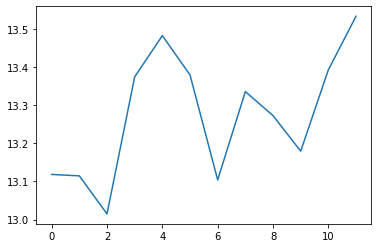

In [9]:
plt.plot(seasonalSOG)

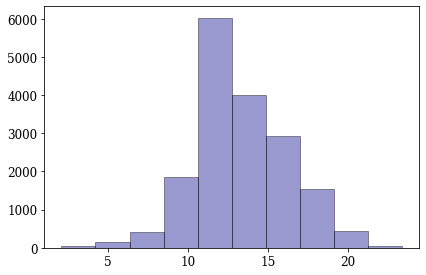

In [10]:
plt.rc('font',family='serif')
plt.tick_params(labelsize=12)
plt.tight_layout()

sns.distplot(trajSOGMeanList \
             , hist=True \
             , kde=False \
             , bins = 10 \
             , color = 'darkblue' \
             , hist_kws = {'edgecolor':'black'} \
             , kde_kws = {'linewidth': 4} \
            )

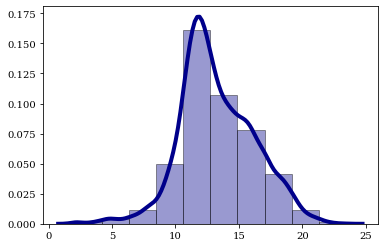

In [11]:
sns.distplot(trajSOGMeanList \
             , hist=True \
             , kde=True \
             , bins = 10 \
             , color = 'darkblue' \
             , hist_kws = {'edgecolor':'black'} \
             , kde_kws = {'linewidth': 4} \
            )

In [12]:
print(trajSOGMeanList.min())
print(trajSOGMeanList.max())
print(trajSOGMeanList.mean())
print(trajSOGMeanList.std())

2.059375
23.438514680483593
13.274769118106052
2.9286421230964232


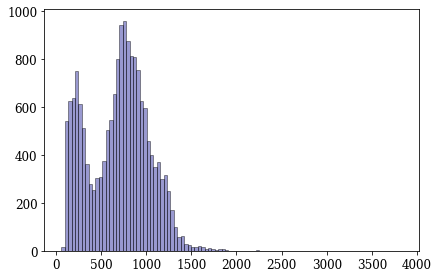

In [13]:
plt.rc('font',family='serif')
plt.tick_params(labelsize=12)
plt.tight_layout()

sns.distplot(trajLenList \
             , hist=True \
             , kde=False \
             , bins = 100 \
             , color = 'darkblue' \
             , hist_kws = {'edgecolor':'black'} \
             , kde_kws = {'linewidth': 4} \
            )

In [14]:
print(trajLenList.min())
print(trajLenList.max())
print(trajLenList.mean())
print(trajLenList.std())

62.68333333333333
3836.383333333333
694.840951672295
338.3172381945411


In [15]:
trajLenShort = (trajLenList <= 90)
print(np.sum(trajLenShort))

6


In [16]:
trajLenLong = (trajLenList > 2000)
print(np.sum(trajLenLong))

12


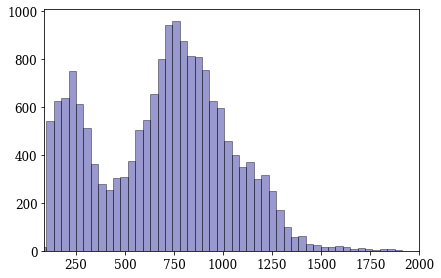

In [17]:
plt.rc('font',family='serif')
plt.tick_params(labelsize=12)
plt.tight_layout()
plt.xlim(90,2000)

sns.distplot(trajLenList \
             , hist=True \
             , kde=False \
             , bins = 100 \
             , color = 'darkblue' \
             , hist_kws = {'edgecolor':'black'} \
             , kde_kws = {'linewidth': 4} \
            )

In [18]:
srcDirTanker = "/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/"
mMSIListFileTanker = srcDirTanker + 'VesselTrajCount.txt'
mMSIListTanker = [line.rstrip('\n') for line in open(mMSIListFileTanker)]

trajSOGMeanTankerList = []
trajSOGMedianTankerList = []
trajSOGStdTankerList = []
trajLenTankerList = []

trajDFTanker = pd.DataFrame(columns=['MMSI' \
                               , 'TRAJ_NUM' \
                               , 'TRAJ_TIME' \
                               , 'SOG_MEAN' \
                               , 'SOG_MEDIAN' \
                               , 'SOG_STD' \
                               , 'TRAJ_MON' \
                               , 'TRAJ_YEAR' \
                               , ])

totalTankerTrajectories = 0
for mMSI in mMSIListTanker[0:-1]:
    vesselName, numTrajs, _ = mMSI.split("-")
    for traj in range(int(numTrajs)):
        vesselFileName = srcDirTanker + vesselName + '_' + str(traj) + '.csv'
        print(vesselFileName)
        ret, _ = aISDM.load_data_from_csv(vesselFileName) 
        ret = aISDM.formate_time(ret,'DateTime')
        trajInitT = ret['DateTime'][0]
        trajEndT = ret['DateTime'][ret['DateTime'].shape[0]-1]

        trajLen = convert_to_seconds(trajEndT - trajInitT)/timeUtils.NUM_SEC_IN_MIN

        trajLenTankerList.append(trajLen)
        trajSOGMeanTankerList.append(ret[c.SOG_COL_NAME].mean())
        trajSOGMedianTankerList.append(ret[c.SOG_COL_NAME].median())
        trajSOGStdTankerList.append(ret[c.SOG_COL_NAME].std())
        
        trajDFTanker = trajDFTanker.append({'MMSI':vesselName \
                                ,'TRAJ_NUM':traj \
                                ,'TRAJ_TIME':trajLen \
                                ,'SOG_MEAN':ret[c.SOG_COL_NAME].mean() \
                                ,'SOG_MEDIAN':ret[c.SOG_COL_NAME].median() \
                                ,'SOG_STD':ret[c.SOG_COL_NAME].std() \
                                ,'TRAJ_MON':trajInitT.month \
                                ,'TRAJ_YEAR':trajInitT.year \
                               } \
                                , ignore_index= True)
        
        totalTankerTrajectories = totalTankerTrajectories + 1
        
trajSOGMeanTankerList = np.array(trajSOGMeanTankerList)
trajSOGMedianTankerList = np.array(trajSOGMedianTankerList)
trajSOGStdTankerList = np.array(trajSOGStdTankerList)
trajLenTankerList = np.array(trajLenTankerList)

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636092413_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636092413_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636092413_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636092413_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636092413_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636092413_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636092413_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636092413_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636092413_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/235009420_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/2350

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/235076283_56.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/235076283_57.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/235076283_58.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/235076283_59.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/235076283_60.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/235076283_61.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/235076283_62.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/235076283_63.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/235076283_64.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/235076283_65.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636014804_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636014804_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636014804_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636014804_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636014804_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636014804_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636014804_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636014804_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636014804_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636014804_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/6360

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367688000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367688000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367688000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367688000_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367688000_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367688000_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367688000_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367688000_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367688000_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367688000_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/477004100_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/229070000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/229070000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/229070000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/229070000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/229070000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/566428000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/229079000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/229079000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/229079000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/2290

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367353110_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/215571000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367353090_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367353080_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367353080_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367353080_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367353080_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367353080_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367353080_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367353080_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367353070_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367353070_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367353070_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/215572000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/215572000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/215572000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/215572000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/219289000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/219289000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/219289000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/2

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636012762_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636012762_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636012762_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636012762_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636012766_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636012766_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636012767_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636012767_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636012767_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636012767_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/6360

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366948190_28.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366948190_29.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366948190_30.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366948190_31.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366948190_32.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366948190_33.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366948190_34.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366948190_35.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366948190_36.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366948190_37.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366962000_41.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366962000_42.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366962000_43.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366962000_44.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366962000_45.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366962000_46.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366962000_47.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366962000_48.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366962000_49.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366962000_50.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366962000_132.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366962000_133.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366962000_134.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366962000_135.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366962000_136.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366962000_137.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366962000_138.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366962000_139.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366962000_140.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366962000_141.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/303656000_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/303656000_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/303656000_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/303656000_23.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/303656000_24.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/303656000_25.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/303656000_26.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/303656000_27.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/303656000_28.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/303656000_29.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/303294000_68.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/303294000_69.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636016731_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/247254200_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/247254200_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/247254200_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/247254200_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/303849000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/303849000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/303849000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/63

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/309891000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/309891000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/309891000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/309686000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/309686000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/309562000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/309562000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/309368000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/309368000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/309368000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/3092

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/374125000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/374125000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/374125000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/308664000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/308664000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/308664000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/308664000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/308664000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/308664000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/308664000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/3086

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/249434000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/256396000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/259833000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/259833000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/259833000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/257005000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/257005000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/257005000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/257005000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/257005000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/2570

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636015177_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636015177_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636015177_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636015177_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636015177_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636015177_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636015177_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636015177_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636015177_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636015177_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/6360

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636015361_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311702000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311702000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/240788000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/240788000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311579000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311579000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311578000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311578000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311578000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/3115

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636015174_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636015174_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636015174_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636015174_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636015174_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636015174_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636015174_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636015174_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636015174_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636015174_23.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000136_44.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000136_45.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000136_46.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000136_47.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000136_48.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000136_49.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000136_50.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_10

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_93.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_94.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_95.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_96.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_97.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_98.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_99.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_100.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_101.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_102.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/M

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_193.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_194.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_195.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_196.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_197.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_198.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_199.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_200.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_201.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_202.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_292.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_293.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_294.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_295.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_296.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_297.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_298.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_299.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_300.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_301.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_111.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_112.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_113.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_114.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_115.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_116.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_117.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_118.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_119.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_120.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_211.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_212.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_213.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_214.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_215.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_216.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_217.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_218.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_219.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_220.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_312.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_313.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_314.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_315.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_316.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_317.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_318.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_319.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_320.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_321.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311017100_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311017100_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311017100_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311017100_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311017100_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311017100_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311017100_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311017100_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311017100_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311017100_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538006503_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538006504_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538006504_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538006504_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/565861000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/565861000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538006507_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538006507_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538006507_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538006507_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/3674

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367457000_86.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367457000_87.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367457000_88.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367457000_89.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367457000_90.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367457000_91.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367457000_92.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367457000_93.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367457000_94.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367457000_95.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538006542_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538006542_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538006545_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538006545_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538006545_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538006545_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538006546_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538006575_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538006575_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538006575_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/5380

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367455580_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367455580_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367455580_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367455580_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367455580_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367455580_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367455580_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367455580_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367455580_23.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367455580_24.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538006763_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538006773_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538006773_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538006773_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538006773_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538006773_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538006789_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538006789_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538006789_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538006805_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/5380

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/338221000_66.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/338221000_67.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538007126_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538007126_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538007126_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538007127_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538007127_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538007127_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538007127_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538007127_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/53

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/368445000_56.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538005254_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538005254_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538005254_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538005254_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538004634_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538005256_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538005256_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538005256_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538005256_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/370

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/368127000_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/368127000_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/368127000_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/368127000_23.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/368127000_24.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/368127000_25.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/368127000_26.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/368127000_27.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/368127000_28.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/368127000_29.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538005322_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538005322_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538005322_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538005077_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538005089_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538005089_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538005089_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538005089_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538005094_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/370697000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/3706

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538005911_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538005911_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538005911_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538005911_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538005939_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538005939_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538005939_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538005939_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538005939_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538005939_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/5380

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538005772_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538005772_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538005772_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538005772_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538004593_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538004593_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538004593_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538005777_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538005777_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538005777_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/5380

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/369540000_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/369540000_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/369540000_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/369540000_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/369540000_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/369540000_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/369540000_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/369540000_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538003858_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538003858_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366508000_52.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366508000_53.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366508000_54.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366508000_55.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366508000_56.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366508000_57.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366508000_58.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366508000_59.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366508000_60.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366508000_61.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538002274_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538002274_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538002274_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538002274_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538002271_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538002271_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538002271_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538002271_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538002271_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538002269_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/5380

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538002663_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538002663_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538002663_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538002663_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538002663_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538002663_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538002663_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538002663_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538002663_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538002663_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_102

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/563170000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/563170000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538004028_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538004028_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538004028_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538004028_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538004017_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538004017_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538004031_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538004031_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/372

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/369040000_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/369040000_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/369040000_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/369040000_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/369040000_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/369040000_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/369040000_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/369040000_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/369040000_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/369040000_23.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/338500000_33.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/338500000_34.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/338500000_35.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/338500000_36.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/338500000_37.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/338500000_38.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/338500000_39.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/338500000_40.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/338500000_41.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/338500000_42.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/369272000_23.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538003929_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538003929_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538003929_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538003929_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538003929_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538003929_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538003929_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/563626000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/563626000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/563

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/354949000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/354949000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/354949000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/355284000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/355284000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/355284000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/564081000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/564081000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/564081000_2.csv


In [19]:
destFileTanker = "/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/Output/TrackLen_1024.csv"
print(trajDFTanker)
aISDM.save_data_to_csv(trajDFTanker, destFileTanker)

           MMSI TRAJ_NUM    TRAJ_TIME   SOG_MEAN  SOG_MEDIAN   SOG_STD  \
0     636092413        0  1152.816667  11.628955       11.80  1.305157   
1     636092413        1   480.183333  12.454067       12.50  0.255388   
2     636092413        2   174.833333  10.142763       10.20  0.310863   
3     636092413        3   281.650000  10.242387       10.20  0.316446   
4     636092413        4   961.983333  11.513462       11.40  0.425636   
5     636092413        5   506.500000  10.307432       10.30  0.492622   
6     636092413        6   456.650000  11.429723       11.30  0.444578   
7     636092413        7   709.333333   8.343891        8.40  0.313753   
8     636092413        8   463.483333  11.685519       11.70  0.421521   
9     235009420        0   381.666667  10.812651       11.90  2.273522   
10    235009420        1   311.883333  10.607895       12.30  3.558521   
11    235009420        2  1098.616667  11.336199       11.50  1.605181   
12    235009420        3  1200.633333 

0

In [20]:
print(totalTankerTrajectories)

4607


In [21]:
month1TrajTankerDF = trajDFTanker.loc[trajDFTanker['TRAJ_MON'] == 1]
month2TrajTankerDF = trajDFTanker.loc[trajDFTanker['TRAJ_MON'] == 2]
month3TrajTankerDF = trajDFTanker.loc[trajDFTanker['TRAJ_MON'] == 3]
month4TrajTankerDF = trajDFTanker.loc[trajDFTanker['TRAJ_MON'] == 4]
month5TrajTankerDF = trajDFTanker.loc[trajDFTanker['TRAJ_MON'] == 5]
month6TrajTankerDF = trajDFTanker.loc[trajDFTanker['TRAJ_MON'] == 6]
month7TrajTankerDF = trajDFTanker.loc[trajDFTanker['TRAJ_MON'] == 7]
month8TrajTankerDF = trajDFTanker.loc[trajDFTanker['TRAJ_MON'] == 8]
month9TrajTankerDF = trajDFTanker.loc[trajDFTanker['TRAJ_MON'] == 9]
month10TrajTankerDF = trajDFTanker.loc[trajDFTanker['TRAJ_MON'] == 10]
month11TrajTankerDF = trajDFTanker.loc[trajDFTanker['TRAJ_MON'] == 11]
month12TrajTankerDF = trajDFTanker.loc[trajDFTanker['TRAJ_MON'] == 12]

In [22]:
seasonalTankerSOG = [ \
    month1TrajTankerDF['SOG_MEAN'].mean() \
    , month2TrajTankerDF['SOG_MEAN'].mean() \
    , month3TrajTankerDF['SOG_MEAN'].mean() \
    , month4TrajTankerDF['SOG_MEAN'].mean() \
    , month5TrajTankerDF['SOG_MEAN'].mean() \
    , month6TrajTankerDF['SOG_MEAN'].mean() \
    , month7TrajTankerDF['SOG_MEAN'].mean() \
    , month8TrajTankerDF['SOG_MEAN'].mean() \
    , month9TrajTankerDF['SOG_MEAN'].mean() \
    , month10TrajTankerDF['SOG_MEAN'].mean() \
    , month11TrajTankerDF['SOG_MEAN'].mean() \
    , month12TrajTankerDF['SOG_MEAN'].mean() \
]

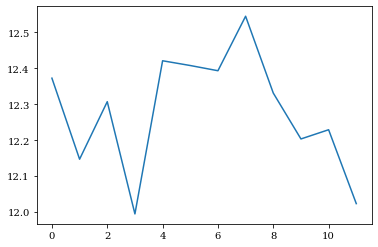

In [23]:
plt.plot(seasonalTankerSOG)

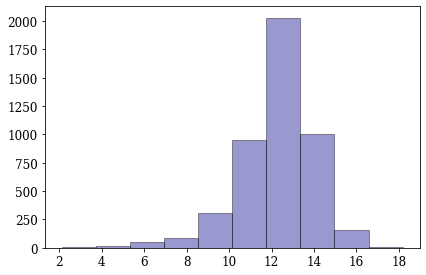

In [24]:
plt.rc('font',family='serif')
plt.tick_params(labelsize=12)
plt.tight_layout()

sns.distplot(trajSOGMeanTankerList \
             , hist=True \
             , kde=False \
             , bins = 10 \
             , color = 'darkblue' \
             , hist_kws = {'edgecolor':'black'} \
             , kde_kws = {'linewidth': 4} \
            )

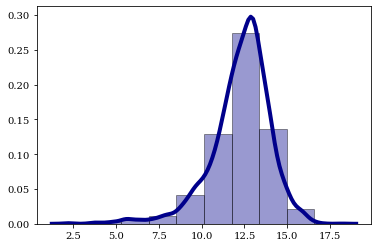

In [25]:
sns.distplot(trajSOGMeanTankerList \
             , hist=True \
             , kde=True \
             , bins = 10 \
             , color = 'darkblue' \
             , hist_kws = {'edgecolor':'black'} \
             , kde_kws = {'linewidth': 4} \
            )

In [26]:
print(trajSOGMeanTankerList.min())
print(trajSOGMeanTankerList.max())
print(trajSOGMeanTankerList.mean())
print(trajSOGMeanTankerList.std())

2.108064516129032
18.177474402730375
12.28710801582572
1.7551085089852838


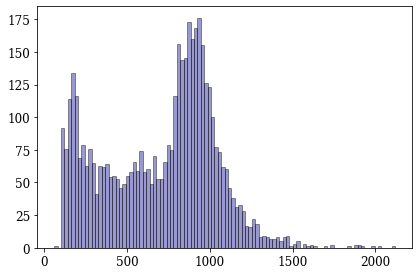

In [27]:
plt.rc('font',family='serif')
plt.tick_params(labelsize=12)
plt.tight_layout()

sns.distplot(trajLenTankerList \
             , hist=True \
             , kde=False \
             , bins = 100 \
             , color = 'darkblue' \
             , hist_kws = {'edgecolor':'black'} \
             , kde_kws = {'linewidth': 4} \
            )

In [28]:
print(trajLenTankerList.min())
print(trajLenTankerList.max())
print(trajLenTankerList.mean())
print(trajLenTankerList.std())

59.18333333333333
2118.65
699.6129006584183
335.58262371604576


In [29]:
trajLenShortTanker = (trajLenTankerList <= 90)
print(np.sum(trajLenShortTanker))

1
